In [21]:
import pyBigWig
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as mi

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [22]:
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)


c = mcolors.ColorConverter().to_rgb
rvb = make_colormap(
    [c('steelblue'), c('white'), 0.26, c('white'), c('orangered')])

# Análisis de datos de Mieloma Múltiple (MM)

* Estudiamos regiones promotor y enhancer de CRBN
    * **Enhancer** GRCH38: Chr.3 3172800-3173801 ENSR00000675670.
    * **Promoter** GRCH38: Chr.3 3178000-3180601 ENSR00000147822.
* Tres tipos de células:
    * Plasma cells.
    * Monocytes.
    * CD38-negative naive B cells.



In [23]:
#Coordenadas
chrom = 'chr3'
init_enh = 3172800
end_enh = 3173801
init_prom = 3178000
end_prom = 3180601

In [24]:
info = pd.read_csv('/mnt/Datum/WGBS/Met_project/Blueprint/Multiple_Myeloma/clases.csv', sep='\t', index_col=0)
cell_type = ['plasma cell', 'monocyte', 'CD38-negative naive B cell']
info = info[info['Cell'].isin(cell_type)]
ids = info.index


In [25]:

df_list = []

for i, pid in enumerate(ids):
    bw = pyBigWig.open("/mnt/Datum/WGBS/Met_project/Blueprint/Multiple_Myeloma/{}.bw".format(pid))
    intervals = bw.intervals(chrom, init_enh, end_enh)
    index = pd.Index([x[0] for x in intervals])
    data_aux = [x[2] for x in intervals]
    df_list.append(pd.DataFrame(data_aux, index = index, columns=[pid]))


df_met_enh = pd.concat(df_list, axis=1)#.fillna(0.0)
print(df_met_enh)

          0      49     98     139    145    795    2222   2855   3068   4625  \
3172868  0.000    NaN  0.026    NaN    NaN  0.326  0.163    NaN    NaN  0.075   
3173087    NaN    NaN    NaN    NaN    NaN    NaN    NaN  0.944    NaN  0.950   
3173092  0.432  0.636  0.650  0.027  0.500  1.000  0.846  0.684  0.857  0.947   
3173125  0.483  0.417  0.105  0.043  0.733  0.821  0.717  0.609  0.450  0.560   
3173213  0.000  0.692  0.200  0.023  0.278  0.634  0.543  0.074  0.037  0.152   
3173245  0.000  0.231  0.182  0.022  0.225  0.585  0.588    NaN  0.000  0.103   
3173284  0.000  0.231  0.029  0.000  0.028  0.159  0.229    NaN  0.000  0.062   
3173303  0.037  0.714  0.486  0.000  0.206  0.711  0.583  0.227    NaN  0.448   
3173308  0.067  0.455  0.526  0.000  0.176  0.738  0.529    NaN  0.000  0.100   
3173336  0.067  0.571  0.375  0.000  0.452  0.565  0.558    NaN  0.167  0.219   
3173352  0.000  0.133  0.585  0.000  0.207  0.542  0.605    NaN  0.000  0.241   
3173598  0.025  0.667  0.000

Visualizing missing value using bar graph
AxesSubplot(0.125,0.125;0.698618x0.755)


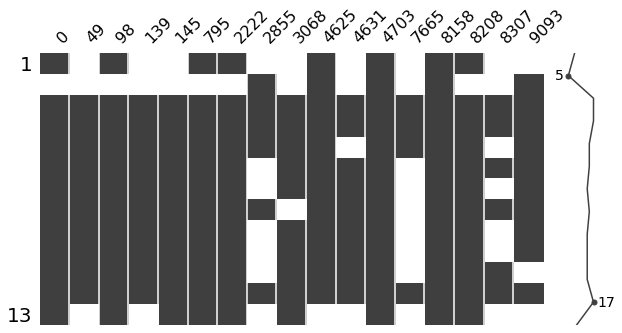

In [26]:
print("Visualizing missing value using bar graph")
print(mi.matrix(df_met_enh, figsize = (10,5)))

In [27]:
df_list = []

for i, pid in enumerate(ids):
    bw = pyBigWig.open("/mnt/Datum/WGBS/Met_project/Blueprint/Multiple_Myeloma/{}.bw".format(pid))
    intervals = bw.intervals(chrom, init_prom, end_prom)
    index = pd.Index([x[0] for x in intervals])
    data_aux = [x[2] for x in intervals]
    df_list.append(pd.DataFrame(data_aux, index = index, columns=[pid]))


df_met_prom = pd.concat(df_list, axis=1)#.fillna(0.0)
print(df_met_prom)

          0      49     98     139    145    795    2222   2855   3068   4625  \
3178041  0.133    NaN  0.333    NaN  0.559  0.371  0.275  0.865  0.846    NaN   
3178096  0.389    NaN  0.559    NaN  0.557  0.068  0.203  0.706  0.625    NaN   
3178108  0.400    NaN  0.429    NaN  0.545  0.128  0.258  0.735  0.814  0.526   
3178160  0.949    NaN  0.586  0.985  0.971  0.840  0.774  0.974  0.957  0.943   
3178264  0.972  1.000  0.980  0.468  0.444  0.627  0.678  0.742  0.696  0.543   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3180147  0.020    NaN  0.021    NaN    NaN  0.167  0.182  0.800  1.000    NaN   
3180307  0.588    NaN  0.074    NaN    NaN  0.294  0.714    NaN    NaN  0.333   
3180491  0.286  0.944  0.078    NaN    NaN  0.818  0.857  0.923  1.000  0.889   
3180520  0.172  0.786  0.021    NaN    NaN  0.676  0.538  0.955  1.000  0.765   
3180588  0.872  1.000  0.653  0.889  1.000  0.946  0.912  1.000  1.000  1.000   

          4631   4703   766

Visualizing missing value using bar graph
AxesSubplot(0.125,0.125;0.698618x0.755)


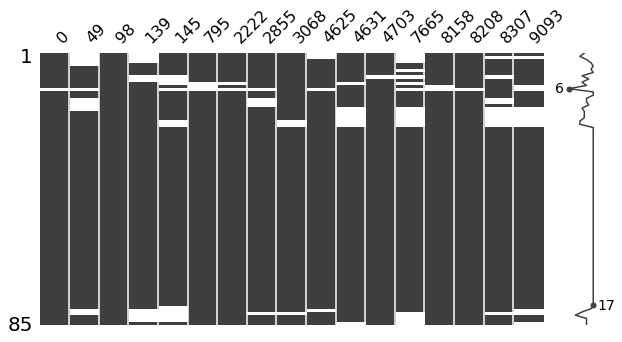

In [28]:
print("Visualizing missing value using bar graph")
print(mi.matrix(df_met_prom, figsize = (10,5)))

In [29]:
df_disease = pd.DataFrame(info['Disease'], df_met_enh.T.index, columns=['Disease'])
lut = dict(zip(np.unique(df_disease), ["r", "g"]))
row_colors = pd.DataFrame()
row_colors['Disease'] = df_disease.apply(lambda x: lut[x['Disease']], axis=1)

df_cell = pd.DataFrame(info['Cell'], df_met_enh.T.index, columns=['Cell'])
lut = dict(zip(np.unique(df_cell), "ygbcm"))
print(lut)
row_colors_2 = pd.DataFrame()
row_colors_2['Cell'] = df_cell.apply(lambda x: lut[x['Cell']], axis=1)

{'CD38-negative naive B cell': 'y', 'monocyte': 'g', 'plasma cell': 'b'}


In [30]:
def plot_heatmap(data, labels, min_value=0.26):
    fig, ax = plt.subplots(figsize=(10,6)) 
    ax = sns.heatmap(data, cmap=rvb, xticklabels=False, yticklabels=labels)
    ax.set_facecolor('dimgrey')

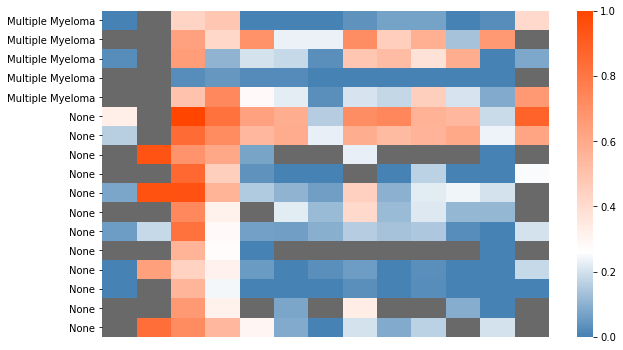

In [31]:
plot_heatmap(df_met_enh.T, df_disease["Disease"])

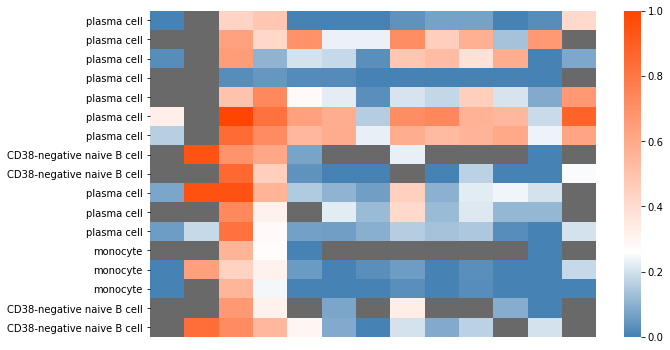

In [32]:
plot_heatmap(df_met_enh.T, df_cell["Cell"])


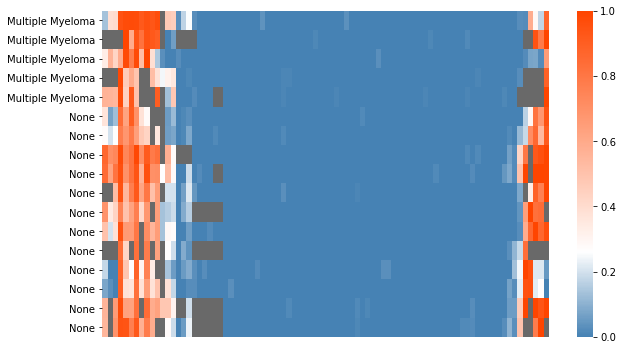

In [33]:
plot_heatmap(df_met_prom.T, df_disease["Disease"])



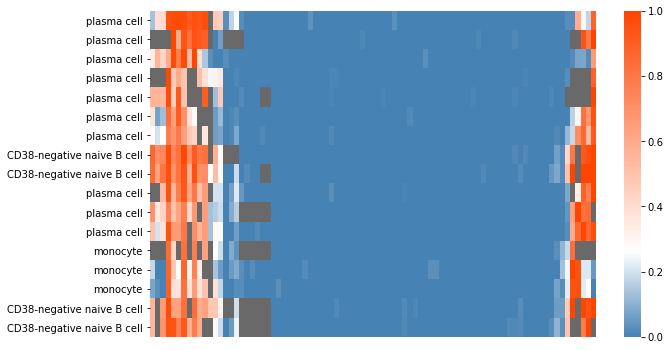

In [34]:
plot_heatmap(df_met_prom.T, df_cell["Cell"])



In [35]:
df_met_enh_notnan = df_met_enh.fillna(0.0)
df_met_prom_notnan = df_met_prom.fillna(0.0)

In [36]:
def plot_clustermap(data, row_colors):
    ax = sns.clustermap(data, cmap=rvb, col_cluster=False, row_colors=row_colors, metric="correlation")
    _ = plt.setp(ax.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)


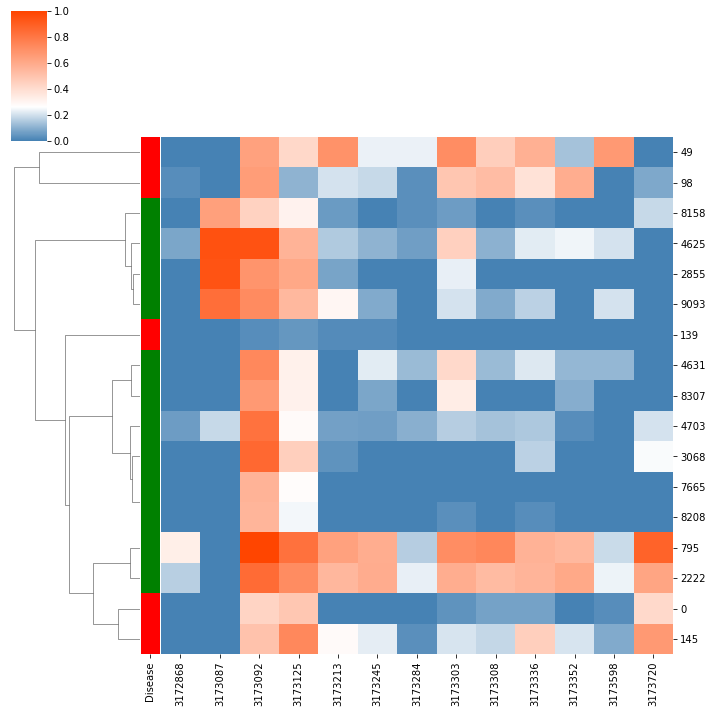

In [37]:
plot_clustermap(df_met_enh_notnan.T, row_colors)

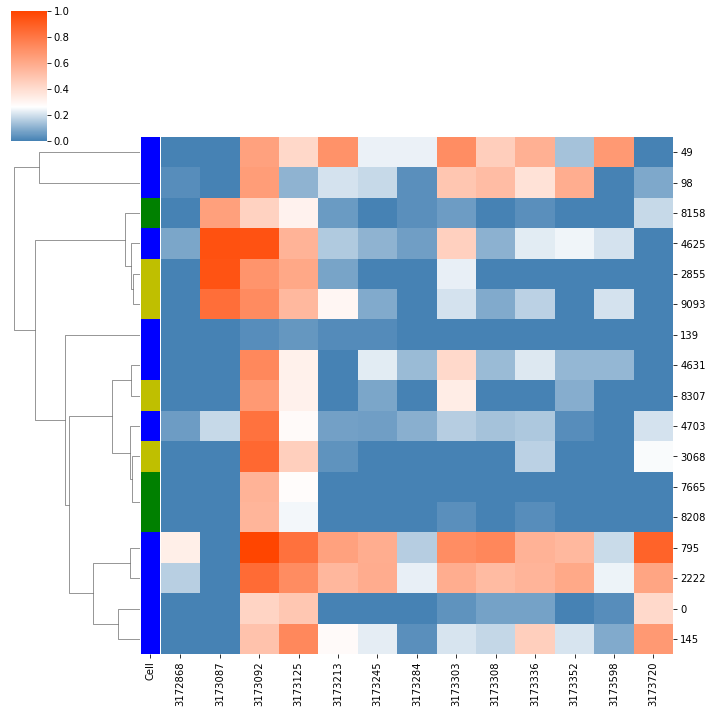

In [38]:
plot_clustermap(df_met_enh_notnan.T, row_colors_2)

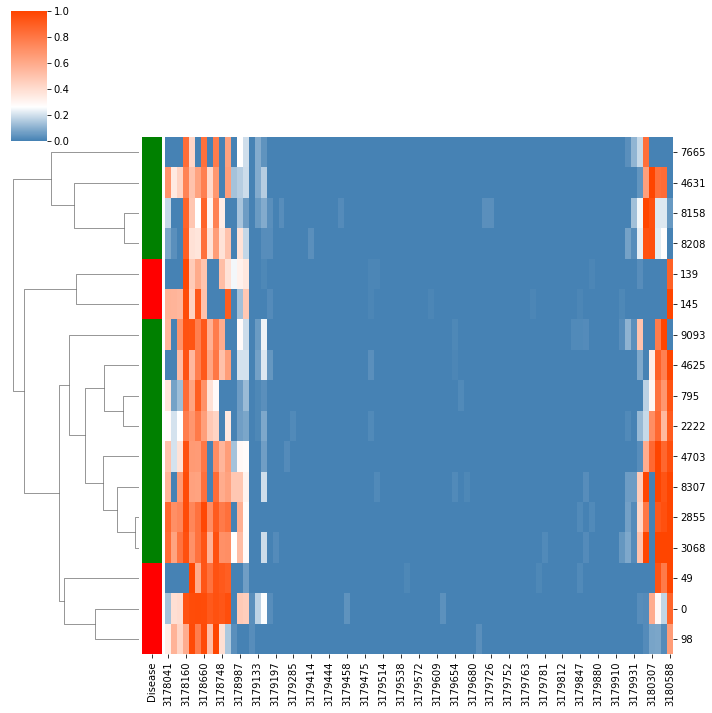

In [39]:
plot_clustermap(df_met_prom_notnan.T, row_colors)

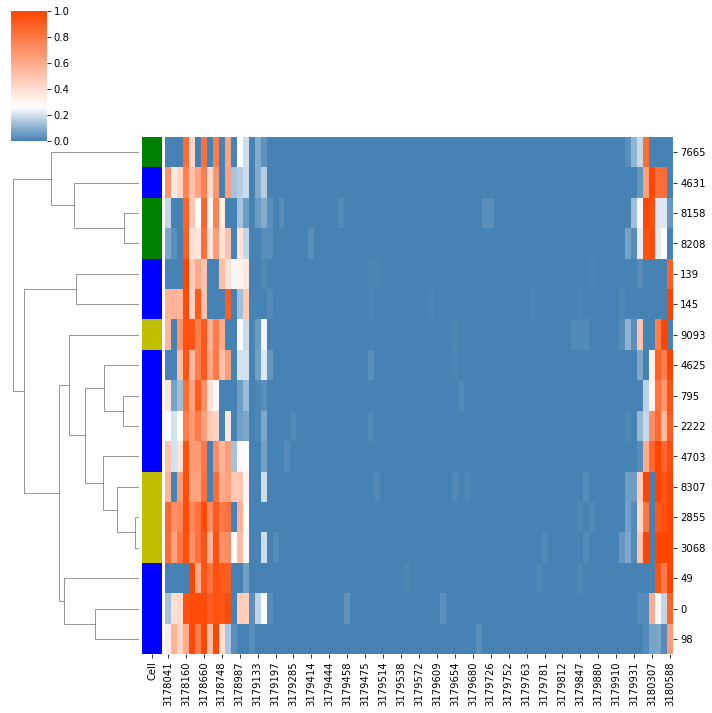

In [40]:
plot_clustermap(df_met_prom_notnan.T, row_colors_2)
